In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
np.set_printoptions(precision=4, linewidth=100)
df = pd.read_csv('Datasets/MBA Salary.csv')

In [31]:
df

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [33]:
# Creating feature set (X) and Outcome Variable (Y)
import statsmodels.api as sm
X = sm.add_constant(df['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [34]:
y = df['Salary']
y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

In [35]:
# Splitting the dataset into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [36]:
# Fitting the model
mba_sal = sm.OLS(y_train, X_train).fit()
print(mba_sal.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [37]:
# MBA Salary = 30587.3 + 3560.6 * (Percentage in Grade 10)

In [38]:
# Regression Model Summary
mba_sal.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-10-07 22:39      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

#### The model R-squared value is 0.211, that is, the model explains 21.1% of the variation in Salary.

#### The p-value for the t-test is 0.0029 which indicates that there is a statistically significant relationship (at significance value a = 0.05) between the feature, percentage in grade 10, and salary. Also, the probability value of F-statistic of the model is 0.0029 which indicates that the overall model is statistically significant

<Figure size 800x600 with 0 Axes>

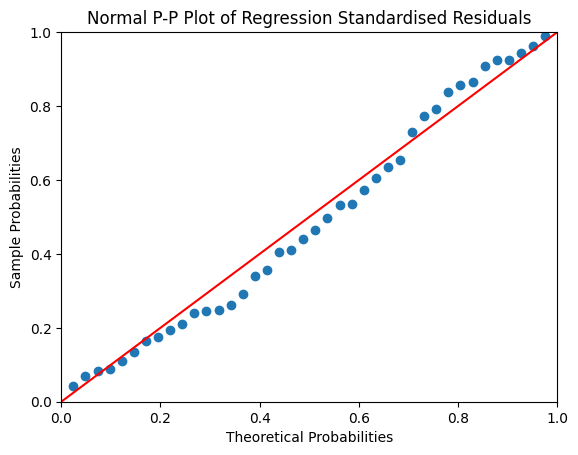

In [39]:
# Residual Analysis
# 1. Checking for Normal destribution of residuals
mba_sal_resid = mba_sal.resid
probplot = sm.ProbPlot(mba_sal_resid, fit=True)
plt.figure(figsize = (8, 6))
probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardised Residuals')
plt.show()

The diagonal line is the cumulative distribution of a normal distribution, whereas the dots represent the cumulative distribution of the residuals. Since the dots are close to the diagonal line, we can conclude that the residuals follow an approximate normal distribution

Text(0, 0.5, 'Standardized Residuals')

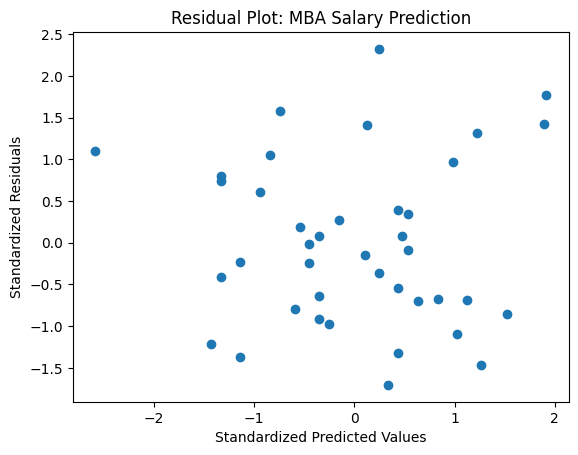

In [40]:
# 2. Test of Homoscedasticity
def get_standardized_values(vals):
	return (vals - vals.mean())/vals.std()
	
plt.scatter(get_standardized_values(mba_sal.fittedvalues), 
						get_standardized_values(mba_sal_resid))
plt.title("Residual Plot: MBA Salary Prediction")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residuals")

In [41]:
# Outlier Analysis
# 1. Z-Score
# 2. Cook's Distance
# 3. Leverage Values

In [42]:
# 1. Z-Score
from scipy.stats import zscore
df['z_score_sal'] = zscore(df['Salary'])
df[(df['z_score_sal'] > 3) | (df['z_score_sal'] < -3)]

,S. No.,Percentage in Grade 10,Salary,z_score_sal


##### There are no observations that are outliers as per the Z-score

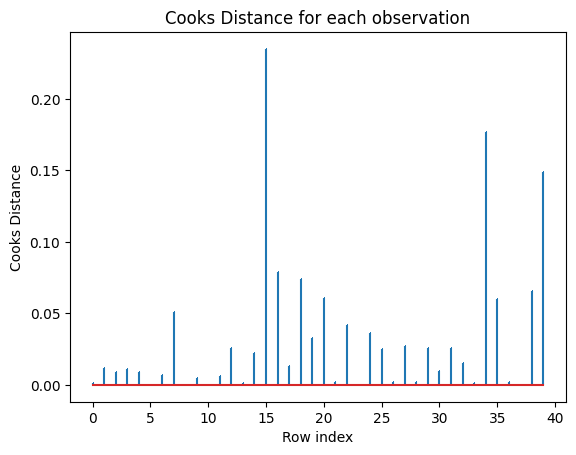

In [43]:
# 2. Cook's Distance
mba_influence = mba_sal.get_influence()
(c, p) = mba_influence.cooks_distance

plt.stem(np.arange(len(X_train)), np.round(c, 3), markerfmt=",")
plt.title('Cooks Distance for each observation')
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

From above figure, it can be observed that none of the observations’ Cook’s distance exceed 1 and hence
none of them are outliers.

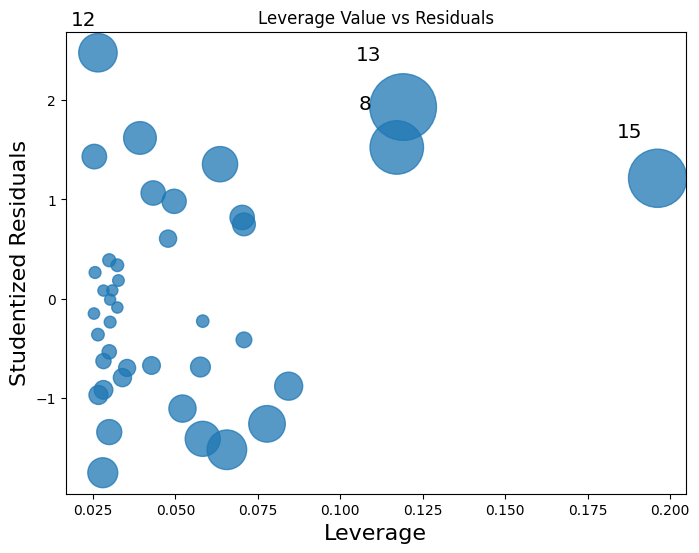

In [44]:
# 3. Leverage Values
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(8,6))
influence_plot(mba_sal, ax = ax)
plt.title('Leverage Value vs Residuals')
plt.show()

In [45]:
# Making Prediction and Measuring Accuracy
# 1. Predicting using validation set
# 2. Finding R-Squared and RMSE
# 3. Calculating Prediction Intervals

In [46]:
# 1. Predicting Using validation Set
y_pred = mba_sal.predict(X_test)
y_pred

6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
49    247070.998530
5     226419.591709
33    308313.101515
20    254904.290772
42    295494.986937
dtype: float64

In [47]:
# 2. Finding R-Squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R-Squared: {np.abs(r2)}, RMSE: {rmse}')

R-Squared: 0.156645849742304, RMSE: 73458.04348346895


In [48]:
# 3. Calculating Prediction Intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, y_pred_low, y_pred_high = wls_prediction_std(mba_sal, X_test, alpha = 0.1)

y_pred_df = pd.DataFrame({'grade_10_perc': X_test['Percentage in Grade 10'],
                         'y_pred': y_pred,
                         'y_pred_low': y_pred_low,
                         'y_pred_high': y_pred_high})

In [49]:
y_pred_df

,grade_10_perc,y_pred,y_pred_low,y_pred_high
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366
